## Necessary Imports and Installations

Please refer to the requirements txt file attached for updating the 'pyarrow' library and installing the 'datasets' library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from datasets import load_dataset
from wordcloud import WordCloud
import spacy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
#from sklearn.preprocessing import Labelabelinarizer
from sklearn.svm import SVC
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.utils import to_categorical

## Data Loading

In [2]:
dataset = load_dataset("surrey-nlp/PLOD-CW")

In [3]:
train_data = pd.DataFrame(dataset["train"])
valid_data = pd.DataFrame(dataset["validation"])
test_data = pd.DataFrame(dataset["test"])

In [4]:
# The train data's pos_tags column is taken out
train_data = train_data.drop(columns=['pos_tags'])

# The validation data's pos_tags column is taken out
valid_data = valid_data.drop(columns=['pos_tags'])

# The test data's pos_tags column is taken out
test_data = test_data.drop(columns=['pos_tags'])

In [5]:
# visualize the first five rows
train_data.head() 

,tokens,ner_tags
0,"[For, this, purpose, the, Gothenburg, Young, P...","[B-O, B-O, B-O, B-O, B-LF, I-LF, I-LF, I-LF, I..."
1,"[The, following, physiological, traits, were, ...","[B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-LF, I-LF..."
2,"[Minor, H, antigen, alloimmune, responses, rea...","[B-O, B-AC, B-O, B-O, B-O, B-O, B-O, B-O, B-O,..."
3,"[EPI, =, Echo, planar, imaging, .]","[B-AC, B-O, B-LF, I-LF, I-LF, B-O]"
4,"[Furthermore, ,, eNOS, -, derived, NO, S, -, n...","[B-O, B-O, B-AC, B-O, B-O, B-AC, B-O, B-O, B-O..."


In [6]:
valid_data.head()

,tokens,ner_tags
0,"[=, Manual, Ability, Classification, System, ;...","[B-O, B-LF, I-LF, I-LF, I-LF, B-O, B-AC, B-O, ..."
1,"[Electro, -, oculography, (, EOG, ), (, RetiPo...","[B-LF, I-LF, I-LF, B-O, B-AC, B-O, B-O, B-O, B..."
2,"[Soluble, N, -, ethylmaleimide, -, sensitive, ...","[B-LF, I-LF, I-LF, I-LF, I-LF, I-LF, I-LF, I-L..."
3,"[t, -SNAREs, Syn-1A, and, SNAP25, through, the...","[B-AC, B-AC, B-AC, B-O, B-O, B-O, B-O, B-O, B-..."
4,"[Large, whole, genome, sequencing, (, WGS, ), ...","[B-O, B-LF, I-LF, I-LF, B-O, B-AC, B-O, B-O, B..."


In [7]:
test_data.head()

,tokens,ner_tags
0,"[Abbreviations, :, GEMS, ,, Global, Enteric, M...","[B-O, B-O, B-AC, B-O, B-LF, I-LF, I-LF, I-LF, ..."
1,"[Fractions, from, FPLC, purification, were, tr...","[B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, ..."
2,"[We, developed, a, variant, of, gene, set, enr...","[B-O, B-O, B-O, B-O, B-O, B-LF, I-LF, I-LF, I-..."
3,"[Red, represents, samples, having, the, normal...","[B-O, B-O, B-O, B-O, B-O, B-O, B-AC, B-O, B-O,..."
4,"[(, D, ), Lysates, of, rectal, cancer, tissues...","[B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-O, ..."


## Exploratory Data Analysis

Two visualisation functions have been defined in the below code: plot_pie_chart, which plots a pie chart to show the distribution of Named Entity Recognition (NER) tags and generate_wcloud, which generates a word cloud based on the input data. The generate_wcloud function is used to concatenate the input data tokens into a single string and to generate the word cloud using the input parameters. The occurence of each NER tag is counted in plot_pie_chart, and the tags are plotted as a pie chart with custom colours and an exploded slice effect is given.

In [158]:
# Word cloud generation function is defined
def generate_wcloud(data, title):
    # Conversion of stacked list of tokens to a single string
    text = ' '.join(data.explode())
    # Using the given parameters, create a word cloud
    wordcloud = WordCloud(width=500, height=300, background_color='white', colormap='ocean',
                          max_words=50, contour_width=3, contour_color='darkgray',
                          stopwords=None).generate(text)
    # Word cloud is plotted
    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"{title}\n", color='green', fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Function to plot pie chart
def plot_pie_chart(data, title):
    # Occurrences of each NER tag is counted
    tag_counts = data.value_counts()

    # Custom colors are defined
    custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

    # The highest count slice is exploded, giving a 3D effect
    explode = [0.2 if count == tag_counts.max() else 0 for count in tag_counts]

    # Pie chart is plotted
    plt.figure(figsize=(4, 4))
    plt.pie(tag_counts, labels=tag_counts.index, autopct='%1.1f%%', colors=custom_colors, startangle=140, explode=explode, shadow=True)
    plt.title(title, color='navy', fontweight='bold', pad=20)  # Custom title settings
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.legend(loc="lower right", fontsize=12, bbox_to_anchor=(0.5, -0.2), title="NER Tags", title_fontsize="13")  # Custom legend settings
    plt.show()

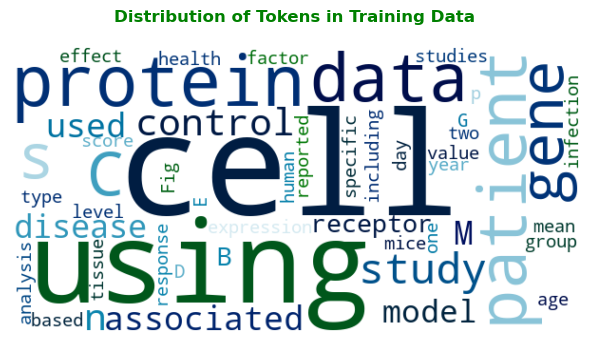

In [159]:
# The word cloud is generated
generate_wcloud(train_data['tokens'], 'Distribution of Tokens in Training Data')

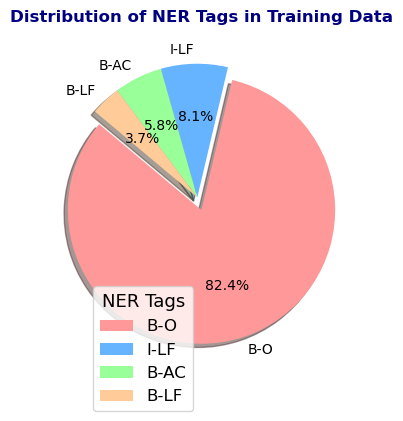

In [160]:
# Pie chart is plotted showing the distribution of NER Tags in training data
plot_pie_chart(train_data['ner_tags'].explode(), 'Distribution of NER Tags in Training Data')

Below function plot_token_c is used for counting the total number of tokens in each dataset by using three dataframes as input: train_data, valid_data, and test_data. Also, a bar chart with the token count for each dataset is plotted.

In [161]:
def plot_token_c(train_data, valid_data, test_data):
    plt.figure(figsize=(6, 4))

    # Count of tokens is calculated in each dataset
    train_token_count = sum(len(i) for i in train_data['tokens'])
    valid_token_count = sum(len(j) for j in valid_data['tokens'])
    test_token_count = sum(len(k) for k in test_data['tokens'])

    # Bar chart is plotted 
    plt.bar(['Train', 'Validation', 'Test'], [train_token_count, valid_token_count, test_token_count], color=['blue', 'orange', 'green'])
    plt.title('Token Count in Different Datasets',color='darkblue',fontweight='bold')
    plt.xlabel('Dataset')
    plt.ylabel('Token Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

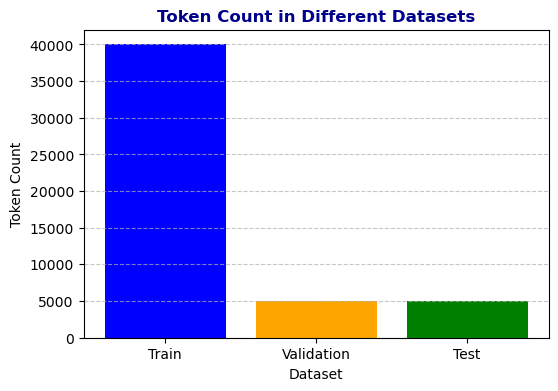

In [162]:
# Bar chart is plotted to show token count in different datasets
plot_token_c(train_data, valid_data, test_data)

The unique token distribution function is used to determine the average count of unique tokens among the train, validation, and test datasets. The distribution of these average unique token numbers is then plotted by a bar chart, as shown below.

In [163]:
# Function to visualize the distribution of unique tokens across train, validation, and test datasets
def unique_token_distribution(train_data, val_data, test_data, title):
    unique_token_train = train_data.apply(lambda k: len(set(k))).mean()
    unique_token_val = val_data.apply(lambda k: len(set(k))).mean()
    unique_token_test = test_data.apply(lambda k: len(set(k))).mean()

    plt.figure(figsize=(6, 4))
    plt.bar(['Train', 'Validation', 'Test'], [unique_token_train, unique_token_val, unique_token_test], color=['blue', 'orange', 'green'])
    plt.title(title, color='darkblue', fontweight='bold')
    plt.xlabel('Datasets', fontsize=12, color='darkblue')
    plt.ylabel('Average Unique Tokens Count', color='darkblue')
    plt.xticks(fontsize=10, color='darkblue')
    plt.yticks(fontsize=10, color='darkblue')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

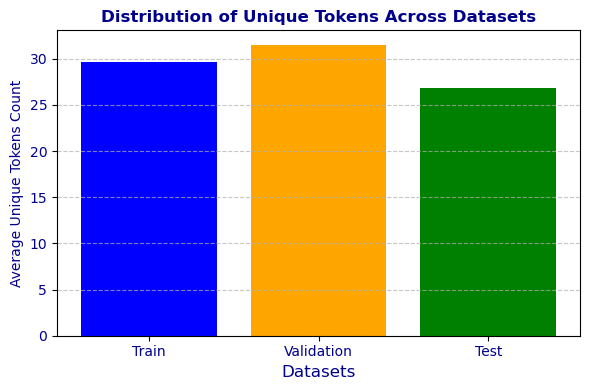

In [164]:
# Bar chart to visualize the distribution of unique tokens across train, validation, and test datasets
unique_token_distribution(train_data['tokens'], valid_data['tokens'], test_data['tokens'], 'Distribution of Unique Tokens Across Datasets')

The function count_tags calculates the frequency of each NER tag for the given input data. Also, plot_stacked_bar_chart computes the number of NER tags for each dataset (train, validation, and test), in order to visualise the distribution of NER tags among them, as shown below.

In [187]:
def count_tags(data):
    tag_counts = {}
    for i in data:
        for tag in i:
            if tag in tag_counts:
                tag_counts[tag] += 1
            else:
                tag_counts[tag] = 1
    return tag_counts

def plot_stacked_bar_chart(train_data, valid_data, test_data, title):
    # NER Tags is counted for each dataset
    train_tag_counts = count_tags(train_data['ner_tags'])
    valid_tag_counts = count_tags(valid_data['ner_tags'])
    test_tag_counts = count_tags(test_data['ner_tags'])

    # Unique tags is obtained by getting a set out of a list of tags
    all_tags = set(list(train_tag_counts.keys()) + list(valid_tag_counts.keys()) + list(test_tag_counts.keys()))

    # DataFrame is created for plotting
    df = pd.DataFrame({'Train': train_tag_counts, 'Validation': valid_tag_counts, 'Test': test_tag_counts}).fillna(0)

    # A stacked bar chart is plotted
    df.plot(kind='bar', stacked=True, figsize=(6, 4))
    plt.title(title, color='darkblue', fontweight='bold')
    plt.xlabel('NER Tags')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Dataset')
    plt.show()

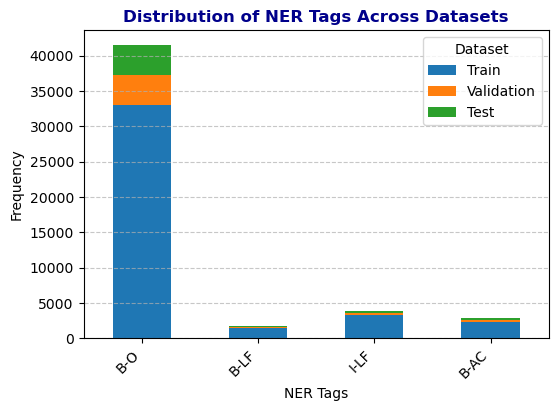

In [188]:
# Stacked bar chart to show NER tag distribution across datasets
plot_stacked_bar_chart(train_data, valid_data, test_data, 'Distribution of NER Tags Across Datasets')

# Experiment1 - Comparing Traditional Algorithms

### 1.1) Using Spacy and Decision Tree

In the code, a spacy model is loaded, then the model applies token embeddings to the test, validation, and training data, and uses these embeddings for training a Decision Tree Classifier. Also, a confusion matrix is created for the test findings, a heatmap is plotted for improved visualisation, and lastly, F1 scores for both validation and test data is computed. Additionally, the ROC curve is generated, alongside computing the ROC area for each class, binarizing the labels, and forecasting probabilities on the test set.

In [11]:
# SpaCy model is loaded
nlp_spacy = spacy.load("en_core_web_sm")

# For each token, we get the corresponding embedding 
def sayo(tokens):
    embeddings = []
    for token in tokens:
        embedding = nlp_spacy(token).vector
        embeddings.append(embedding)
    return embeddings

# Feature extraction is applied to the training data
train_embeddings = [sayo(i) for i in train_data['tokens']]

# Feature extraction is applied to validation data
validation_embeddings = [sayo(j) for j in valid_data['tokens']]

# Feature extraction is applied to test data
test_embeddings = [sayo(k) for k in test_data['tokens']]

In [189]:
# Viewing the format of train embeddings
print(train_embeddings[10]) 

In [52]:
# The 'ner_tags' column is converted to arrays
y_train = train_data['ner_tags'].values
y_validation = valid_data['ner_tags'].values
y_test = test_data['ner_tags'].values

F1 Score for Validation Data: 0.8584144242193436
F1 Score for Test Data: 0.84272729858006


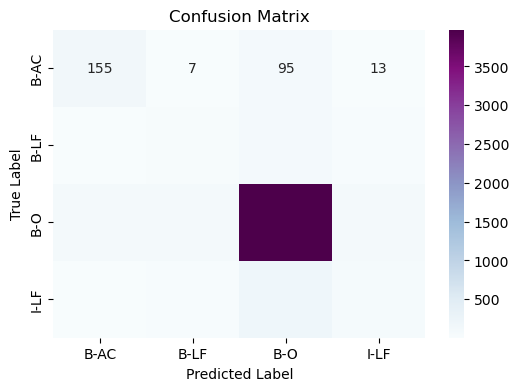

In [53]:
# The Decision Tree Classifier is initialized
model = DecisionTreeClassifier()

# List of embeddings for each sentence is flattened
X_train = [embeddi for embed in train_embeddings for embeddi in embed]
X_validation = [embeddi for embed in validation_embeddings for embeddi in embed]
X_test = [embeddi for embed in test_embeddings for embeddi in embed]

# List of embeddings for each label is flattened
y_train_flat = [label for labels in y_train for label in labels]
y_validation_flat = [label for labels in y_validation for label in labels]
y_test_flat = [label for labels in y_test for label in labels]

# The Decision Tree Classifier is trained
model.fit(X_train, y_train_flat)

# Predictions are made on the validation set
y_pred_valid = model.predict(X_validation)

#Predictions are made on test set
y_pred_test = model.predict(X_test)

# F1 score is calculated for validation data
f1_valid = f1_score(y_validation_flat, y_pred_valid, average='weighted')

# F1 score is calculated for test data
f1_test = f1_score(y_test_flat, y_pred_test, average='weighted')

print("F1 Score for Validation Data:", f1_valid)
print("F1 Score for Test Data:", f1_test)

# Confusion matrix is generated for test results
con_mat = confusion_matrix(y_test_flat, y_pred_test)

# Also, a heatmap is plotted to enhance visualization
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

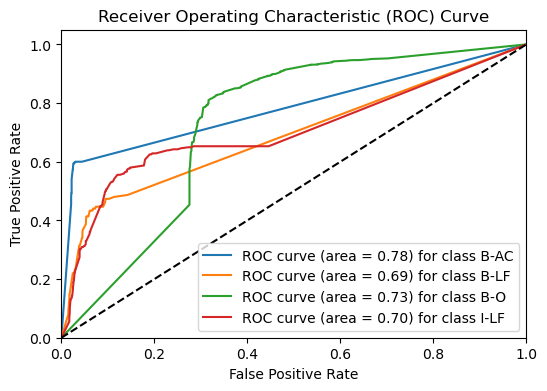

In [62]:
# a label binarizer object is initialized, which converts categorical labels to binary vectors
lb = LabelBinarizer()
y_binarized = lb.fit_transform(y_test_flat)

#Probabilities are predicted on test set instead of class labels
y_pred_prob_test = model.predict_proba(X_test)

# ROC area is calculated for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_pred_prob_test[:, i])  
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC curve is plotted
plt.figure(figsize=(6, 4))
for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.3f) for class %s' % (roc_auc[i], model.classes_[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [324]:
# Having a look at the predicted values
print(y_pred[2])

I-LF


In [330]:
# Having a look at y_train_flat
print(len(y_train_flat))

40000


### 1.2) Using Spacy and SVM

In the code, a spacy model is loaded, then the model applies token embeddings to the test, validation, and training data, and uses these embeddings for training a Support Vector Machine(SVM) classifier. Also, a confusion matrix is created for the test findings, a heatmap is plotted for improved visualisation, and lastly, F1 scores for both validation and test data is computed. Additionally, the ROC curve is generated, alongside computing the ROC area for each class, binarizing the labels, and forecasting probabilities on the test set.

In [69]:
# SpaCy model is loaded
nlp_spacy = spacy.load("en_core_web_sm")

# For each token, we get the corresponding embedding
def sayo(tokens):
    embeddings = []
    for token in tokens:
        embedding = nlp_spacy(token).vector
        embeddings.append(embedding)
    return embeddings

# Feature extraction is applied to the training data
train_embeddings = [sayo(i) for i in train_data['tokens']]

# Feature extraction is applied to validation data
validation_embeddings = [sayo(j) for j in valid_data['tokens']]

# Feature extraction is applied to test data
test_embeddings = [sayo(k) for k in test_data['tokens']]

F1 Score for Validation Data: 0.8364569214876768
F1 Score for Test Data: 0.8390717143933436


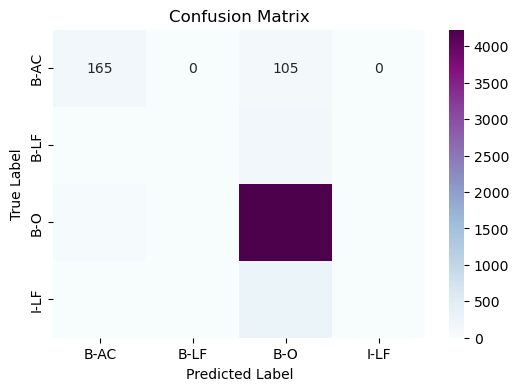

In [73]:
# The 'ner_tags' column is converted to arrays
y_train = train_data['ner_tags'].values
y_validation = valid_data['ner_tags'].values
y_test = test_data['ner_tags'].values

# List of embeddings for each sentence is flattened
X_train = [embeddi for embed in train_embeddings for embeddi in embed]
X_validation = [embeddi for embed in validation_embeddings for embeddi in embed]
X_test = [embeddi for embed in test_embeddings for embeddi in embed]

# List of labels for each sentence is flattened
y_train_flat = [label for labels in y_train for label in labels]
y_validation_flat = [label for labels in y_validation for label in labels]
y_test_flat = [label for labels in y_test for label in labels]

# The SVM Classifier is initialized
model = SVC(probability=True)

# The SVM Classifier is trained
model.fit(X_train, y_train_flat)

# Predictions are made on the validation set
y_pred_valid = model.predict(X_validation)

#Predictions are made on test set
y_pred_test = model.predict(X_test)

# F1 score is calculated for validation data
f1_valid = f1_score(y_validation_flat, y_pred_valid, average='weighted')

# F1 score is calculated for test data
f1_test = f1_score(y_test_flat, y_pred_test, average='weighted')

print("F1 Score for Validation Data:", f1_valid)
print("F1 Score for Test Data:", f1_test)

# Confusion matrix is generated for test results
con_mat = confusion_matrix(y_test_flat, y_pred_test)

# Also, a heatmap is plotted to enhance visualization
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

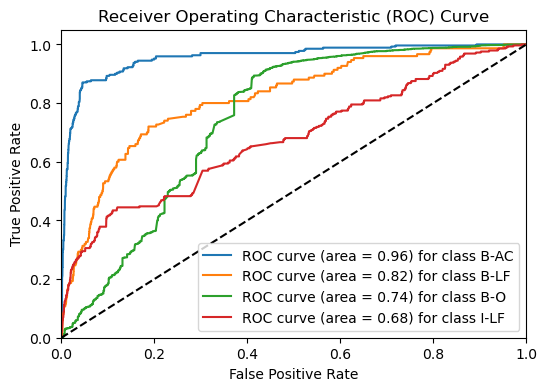

In [74]:
# a label binarizer object is initialized, which converts categorical labels to binary vectors
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test_flat)

# Probabilities are predicted on test set instead of class labels
y_pred_prob_test = model.predict_proba(X_test)

# ROC area is calculated for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC curve is plotted
plt.figure(figsize=(6, 4))
for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.3f) for class %s' % (roc_auc[i], model.classes_[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Experiment2 - Comparing Features/Vectorization Methods

### 2.1) Using Word2Vec and RF

The tokenized input is used for training a Word2Vec model and the embeddings are used for training a Random Forest Classifier. Then the F1 score is computed, confusion matrices are created, and ROC curves are plotted to assess the classifier's performance on the validation and test datasets.

F1 Score for Validation Data: 0.7688003163990459
F1 Score for Test Data: 0.7727602045207106


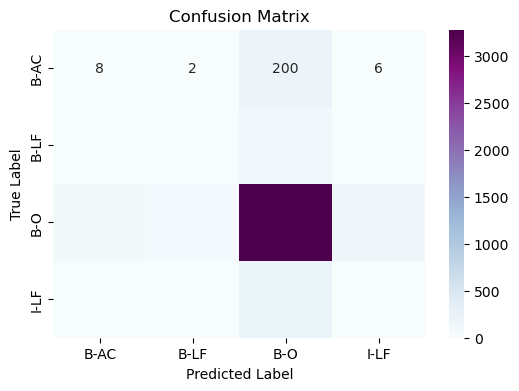

In [11]:
# All tokens from the training dataset are stored in a variable
tokenized_data = train_data['tokens']

# Next, the Word2Vec model is trained on the above data containing tokens
word2vec_mod = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

# For each token, we get the corresponding embedding
def sayo(tokens):
    embeddings = []
    for token in tokens:
        if token in word2vec_mo.wv:
            embedding = word2vec_mod.wv[token]
            embeddings.append(embedding)
    return embeddings

# Feature extraction is applied to the training data
train_embeddings = [sayo(i) for i in train_data['tokens']]

# Feature extraction is applied to validation data
validation_embeddings = [sayo(j) for j in valid_data['tokens']]

# Feature extraction is applied to test data
test_embeddings = [sayo(k) for k in test_data['tokens']]

# List of embeddings for each sentence is flattened
X_train = [embeddi for embed in train_embeddings for embeddi in embed]
X_validation = [embeddi for embed in validation_embeddings for embeddi in embed]
X_test = [embeddi for embed in test_embeddings for embeddi in embed]

# List of labels for each sentence is flattened
y_train_flat = [label for labels in y_train for label in labels]
y_validation_flat = [label for labels in y_validation for label in labels]
y_test_flat = [label for labels in y_test for label in labels]

# The Random Forest Classifier is initialized
model = RandomForestClassifier()

# The Random Forest Classifier is trained
model.fit(X_train, y_train_flat)

# Predictions are made on the validation set
y_pred_valid = model.predict(X_validation)

# Predictions are made on test set
y_pred_test = model.predict(X_test)

# y_validation_flat is trimmed to match the length of y_pred_valid
y_validation_flat_trimmed = y_validation_flat[:len(y_pred_valid)]

# y_test_flat is trimmed to match the length of y_pred_test
y_test_flat_trimmed = y_test_flat[:len(y_pred_test)]

# F1 score is calculated for validation data
f1_valid = f1_score(y_validation_flat_trimmed, y_pred_valid, average='weighted')

# F1 score is calculated for test data
f1_test = f1_score(y_test_flat_trimmed, y_pred_test, average='weighted')

print("F1 Score for Validation Data:", f1_valid)
print("F1 Score for Test Data:", f1_test)

# Confusion matrix is generated for test results
con_mat = confusion_matrix(y_test_flat_trimmed, y_pred_test)

# Also, a heatmap is plotted to enhance visualization
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

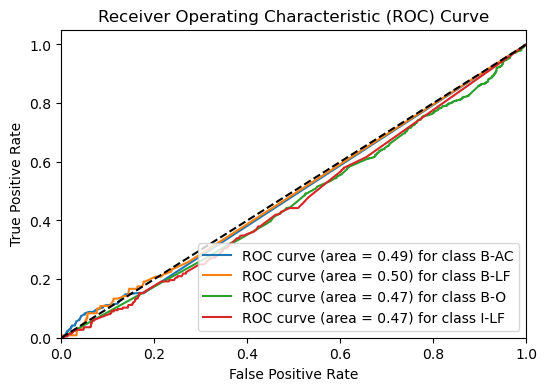

In [14]:
# a label binarizer object is initialized, which converts categorical labels to binary vectors
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test_flat_trimmed)

# Probabilities are predicted on test set instead of class labels
y_pred_prob_test = model.predict_proba(X_test)

# ROC area is calculated for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC curve is plotted
plt.figure(figsize=(6, 4))
for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.3f) for class %s' % (roc_auc[i], model.classes_[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [17]:
# Check to see what y_pred gives
print(y_pred[1])

I-LF


### 2.2) Using Spacy and RF

SpaCy embeddings which are taken from tokenized data, is used for training a Random Forest Classifier. Also, F1 scores are computed, confusion matrix is created, and ROC curve is plotted for assessing the classifier's performance on the validation and test datasets.

In [18]:
# SpaCy model is loaded
nlp_spacy = spacy.load("en_core_web_sm")

# For each token, we get the corresponding embedding
def sayo(tokens):
    embeddings = []
    for token in tokens:
        embedding = nlp_spacy(token).vector
        embeddings.append(embedding)
    return embeddings

# Feature extraction is applied to the training data
train_embeddings = [sayo(i) for i in train_data['tokens']]

# Feature extraction is applied to validation data
validation_embeddings = [sayo(j) for j in valid_data['tokens']]

# Feature extraction is applied to test data
test_embeddings = [sayo(k) for k in test_data['tokens']]

F1 Score for Validation Data: 0.8750114374350023
F1 Score for Test Data: 0.8531593722680957


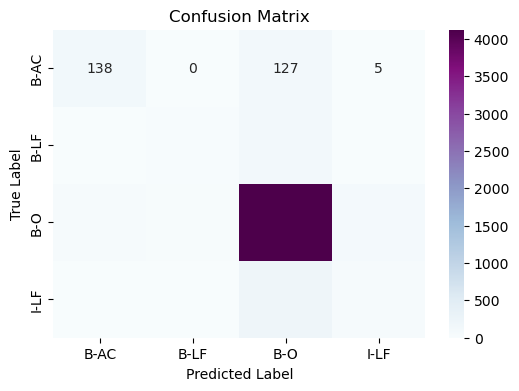

In [19]:
# The 'ner_tags' column is converted to arrays
y_train = train_data['ner_tags'].values
y_validation = valid_data['ner_tags'].values
y_test = test_data['ner_tags'].values

# List of embeddings for each sentence is flattened
X_train = [embeddi for embed in train_embeddings for embeddi in embed]
X_validation = [embeddi for embed in validation_embeddings for embeddi in embed]
X_test = [embeddi for embed in test_embeddings for embeddi in embed]

# FList of embeddings for each label is flattened
y_train_flat = [label for labels in y_train for label in labels]
y_validation_flat = [label for labels in y_validation for label in labels]
y_test_flat = [label for labels in y_test for label in labels]

# The Random Forest Classifier is initialized
model = RandomForestClassifier()

# The Random Forest Classifier is trained
model.fit(X_train, y_train_flat)

# Predictions are made on the validation set
y_pred_valid = model.predict(X_validation)

#Predictions are made on test set
y_pred_test = model.predict(X_test)

# F1 score is calculated for validation data
f1_valid = f1_score(y_validation_flat, y_pred_valid, average='weighted')

# F1 score is calculated for test data
f1_test = f1_score(y_test_flat, y_pred_test, average='weighted')

print("F1 Score for Validation Data:", f1_valid)
print("F1 Score for Test Data:", f1_test)

# Confusion matrix is generated for test results
con_mat = confusion_matrix(y_test_flat, y_pred_test)

# Also, a heatmap is plotted to enhance visualization
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

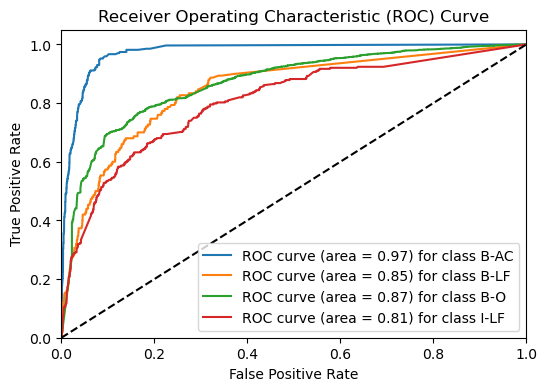

In [20]:
# a label binarizer object is initialized, which converts categorical labels to binary vectors
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test_flat)

# Probabilities are predicted on test set instead of class labels
y_pred_prob_test = model.predict_proba(X_test)

# ROC area is calculated for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC curve is plotted
plt.figure(figsize=(6, 4))
for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.3f) for class %s' % (roc_auc[i], model.classes_[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Experiment3 - Comparing Deep Learning Algorithms

### 3.1) Using Spacy and CNN

For every token in the dataset, token embeddings are extracted by loading SpaCy's medium-sized English model. Then, a Convolutional Neural Network (CNN) model is built from those embeddings for named entity recognition. The effectiveness of the model is determined using ROC curves, confusion matrices, and F1 scores.

In [5]:
from sklearn.metrics import classification_report

# SpaCy model is loaded
nlp_spacy = spacy.load("en_core_web_md")

# For each token, we get the corresponding embedding
def sayo(tokens):
    embeddings = []
    for token in tokens:
        embedding = nlp_spacy(token).vector
        embeddings.append(embedding)
    return embeddings

# Feature extraction is applied to the training data
train_embeddings = [sayo(i) for i in train_data['tokens']]
train_embeddings_flat = np.array([embedding for sub in train_embeddings for embedding in sub])

# Feature extraction is applied to validation data
validation_embeddings = [sayo(j) for j in valid_data['tokens']]
validation_embeddings_flat = np.array([embedding for sub in validation_embeddings for embedding in sub])

# Feature extraction is applied to test data
test_embeddings = [sayo(k) for k in test_data['tokens']]
test_embeddings_flat = np.array([embedding for sub in test_embeddings for embedding in sub])

# Data arrays are reshaped to fit CNN input shape
train_embeddings_flat = train_embeddings_flat.reshape(-1, 300, 1)  # Assume spaCy vectors are of size 300
validation_embeddings_flat = validation_embeddings_flat.reshape(-1, 300, 1)
test_embeddings_flat = test_embeddings_flat.reshape(-1, 300, 1)

# the 'ner_tags' column is flattened
train_labels_flat = [label for sub in train_data['ner_tags'] for label in sub]
valid_labels_flat = [label for sub in valid_data['ner_tags'] for label in sub]
test_labels_flat = [label for sub in test_data['ner_tags'] for label in sub]

# labels are converted to numerical indices
label_to_index = {label: i for i, label in enumerate(set(train_labels_flat))}
train_labels = np.array([label_to_index[label] for label in train_labels_flat])
valid_labels = np.array([label_to_index[label] for label in valid_labels_flat])
test_labels = np.array([label_to_index[label] for label in test_labels_flat])

# CNN model is defined
rock = Sequential([
    Conv1D(128, 5, activation='tanh', input_shape=(300, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_to_index), activation='softmax')
])

# the model is compiled with the Adam optimizer
rock.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# the model is trained
rock.fit(train_embeddings_flat, train_labels, epochs=60, batch_size=128, validation_split=0.1)

# # Model is made to predict on validation data
y_pred_valid = rock.predict(validation_embeddings_flat)
y_pred_valid = np.argmax(y_pred_valid, axis=1)

# # Model is made to predict on test data
y_pred_test = rock.predict(test_embeddings_flat)
y_pred_test = np.argmax(y_pred_test, axis=1)

# # Validation labels and test labels are convereted to appropaiate shape
valid_labels = valid_labels[:len(y_pred_valid)]
test_labels = test_labels[:len(y_pred_test)]

# # F1 score is calculated for validation data
f1_valid = f1_score(valid_labels, y_pred_valid, average='weighted')

# # F1 score is calculated for test data
f1_test = f1_score(test_labels, y_pred_test, average='weighted')

# # function is defined to map numerical labels back to their original class names
def map_labels_to_names(labels, label_to_index):
    index_to_label = {v: k for k, v in label_to_index.items()}
    return [index_to_label[label] for label in labels]

# # labels corresponding to the validation data is used
valid_labels_names = map_labels_to_names(valid_labels, label_to_index)
y_pred_names_valid = map_labels_to_names(y_pred_valid, label_to_index)

# # labels corresponding to the test data is used
test_labels_names = map_labels_to_names(test_labels, label_to_index)
y_pred_names = map_labels_to_names(y_pred_test, label_to_index)

print(classification_report(test_labels, y_pred_test))

print("F1 Score for Validation Data:", f1_valid)
print("F1 Score for Test Data:", f1_test)

# rock.save(r"D:\Documents\Surrey Subjects\NLP\my_model2.h5")

C:\Users\Sayonesh Chatterjee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/60
282/282 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - accuracy: 0.8028 - loss: 0.6496 - val_accuracy: 0.8575 - val_loss: 0.4166
Epoch 2/60
282/282 ━━━━━━━━━━━━━━━━━━━━ 26s 91ms/step - accuracy: 0.8335 - loss: 0.4688 - val_accuracy: 0.8590 - val_loss: 0.4042
Epoch 3/60
282/282 ━━━━━━━━━━━━━━━━━━━━ 27s 94ms/step - accuracy: 0.8363 - loss: 0.4530 - val_accuracy: 0.8595 - val_loss: 0.4061
Epoch 4/60
282/282 ━━━━━━━━━━━━━━━━━━━━ 26s 92ms/step - accuracy: 0.8355 - loss: 0.4422 - val_accuracy: 0.8595 - val_loss: 0.4006
Epoch 5/60
282/282 ━━━━━━━━━━━━━━━━━━━━ 26s 90ms/step - accuracy: 0.8357 - loss: 0.4345 - val_accuracy: 0.8600 - val_loss: 0.3926
Epoch 6/60
282/282 ━━━━━━━━━━━━━━━━━━━━ 25s 88ms/step - accuracy: 0.8385 - loss: 0.4262 - val_accuracy: 0.8590 - val_loss: 0.3949
Epoch 7/60
282/282 ━━━━━━━━━━━━━━━━━━━━ 25s 89ms/step - accuracy: 0.8395 - loss: 0.4142 - val_accuracy: 0.8597 - val_loss: 0.3964
Epoch 8/60
282/282 ━━━━━━━━━━━━━━━━━━━━ 26s 93ms/step - accuracy: 0.8401 - loss: 0.4103 - 

In [ ]:
from flask import Flask, request, jsonify
from sklearn.metrics import f1_score
from tensorflow.keras.models import load_model
import numpy as np
import spacy

app = Flask(__name__)

# Load SpaCy model
nlp_spacy = spacy.load("en_core_web_md")

# Define function for embedding extraction
def extract_embeddings(tokens):
    embeddings = []
    for token in tokens:
        embedding = nlp_spacy(token).vector
        embeddings.append(embedding)
    return embeddings

# Load trained model
def load_nn_model(model_path):
    model = load_model(model_path)
    return model

# Load model
model_path = r"D:\Documents\Surrey Subjects\NLP\my_model2.h5" 
model = load_nn_model(model_path)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    tokens = data['tokens']
    
    # Label-to-index mapping
    label_to_index = {0: 'B-LF', 1: 'I-LF', 2: 'B-AC', 3: 'B-O'}
    
    embeddings = np.array([extract_embeddings(tokens)])
    embeddings = embeddings.reshape(-1, 300, 1)
    predictions = model.predict(embeddings)
    predicted_labels = np.argmax(predictions, axis=1)
    
    # Map predicted labels to their corresponding names
    predicted_labels_names = [label_to_index[label] for label in predicted_labels]
    # logging code
    return jsonify({'predictions': predicted_labels_names})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://10.77.231.48:5000
INFO:werkzeug:Press CTRL+C to quit


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


INFO:werkzeug:127.0.0.1 - - [15/May/2024 18:54:55] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


INFO:werkzeug:127.0.0.1 - - [15/May/2024 18:56:16] "POST /predict HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


INFO:werkzeug:127.0.0.1 - - [15/May/2024 18:56:46] "POST /predict HTTP/1.1" 200 -


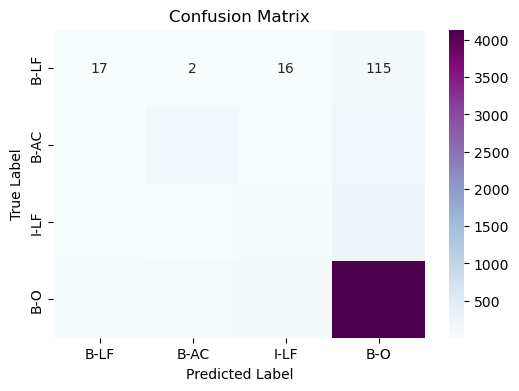

In [18]:
# function is defined to map numerical labels back to their original class names
def map_labels_to_names(labels, label_to_index):
    index_to_label = {v: k for k, v in label_to_index.items()}
    return [index_to_label[label] for label in labels]

# labels corresponding to the validation data is used
valid_labels_names = map_labels_to_names(valid_labels, label_to_index)
y_pred_names_valid = map_labels_to_names(y_pred_valid, label_to_index)

# labels corresponding to the test data is used
test_labels_names = map_labels_to_names(test_labels, label_to_index)
y_pred_names = map_labels_to_names(y_pred_test, label_to_index)

# Confusion matrix is generated for test results
con_mat = confusion_matrix(test_labels, y_pred_test)

# Also, a heatmap is plotted to enhance visualization
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=label_to_index.keys(), yticklabels=label_to_index.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


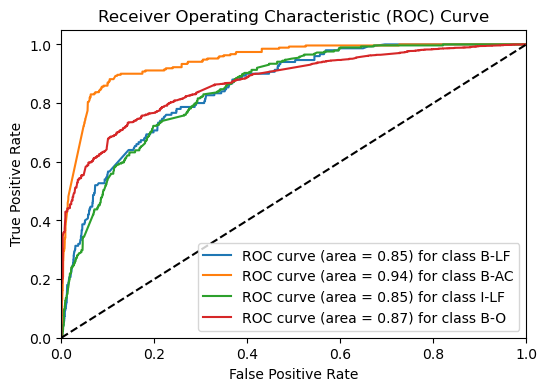

In [21]:
# Probabilities are predicted on test data instead of class labels
y_pred_prob_test = model.predict(test_embeddings_flat)

# softmax function is defined to compute probabilities
def softmax(x):
    exp_x = np.exp(x - np.max(x))  
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

y_pred_prob_test = softmax(y_pred_prob_test)

# original classes are obtained
classes = list(label_to_index.keys())

# ROC area is calculated for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(test_labels == i, y_pred_prob_test[:, i])  # Use one-vs-all strategy
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC curve is plotted
plt.figure(figsize=(6, 4))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.3f) for class %s' % (roc_auc[i], classes[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 3.2) Using Spacy and ANN

For every token in the dataset, token embeddings are extracted by loading SpaCy's medium-sized English model. Then, an Artificial Neural Network (ANN) model is built from those embeddings for named entity recognition. The effectiveness of the model is determined using ROC curves, confusion matrices, and F1 scores.

In [14]:
# SpaCy model is loaded
nlp_spacy = spacy.load("en_core_web_md")

# For each token, we get the corresponding embedding
def sayo(tokens):
    embeddings = []
    for token in tokens:
        embedding = nlp_spacy(token).vector
        embeddings.append(embedding)
    return embeddings

# Feature extraction is applied to the training data
train_embeddings = [sayo(i) for i in train_data['tokens']]
train_embeddings_flat = np.array([embedding for sub in train_embeddings for embedding in sub])

# Feature extraction is applied to validation data
validation_embeddings = [sayo(j) for j in valid_data['tokens']]
validation_embeddings_flat = np.array([embedding for sub in validation_embeddings for embedding in sub])

# Feature extraction is applied to test data
test_embeddings = [sayo(k) for k in test_data['tokens']]
test_embeddings_flat = np.array([embedding for sub in test_embeddings for embedding in sub])

# the 'ner_tags' column is flattened
train_labels_flat = [label for sub in train_data['ner_tags'] for label in sub]
valid_labels_flat = [label for sub in valid_data['ner_tags'] for label in sub]
test_labels_flat = [label for sub in test_data['ner_tags'] for label in sub]

# labels are converetd to numerical indices
label_to_index = {label: i for i, label in enumerate(set(train_labels_flat))}
train_labels = np.array([label_to_index[label] for label in train_labels_flat])
valid_labels = np.array([label_to_index[label] for label in valid_labels_flat])
test_labels = np.array([label_to_index[label] for label in test_labels_flat])

# data arrays are reshaped to be fit to model
train_embeddings_flat = train_embeddings_flat.reshape(-1, 300)
validation_embeddings_flat = validation_embeddings_flat.reshape(-1, 300)
test_embeddings_flat = test_embeddings_flat.reshape(-1, 300)

# ANN model is defined with dropout regularization
rock = Sequential([
    Dense(250, activation='tanh', input_shape=(300,)),
    Dropout(0.5),
    Dense(120, activation='tanh'),
    Dropout(0.5),
    Dense(len(label_to_index), activation='softmax')
])

# model is compiled with the Adam optimizer
rock.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model is trained
rock.fit(train_embeddings_flat, train_labels, epochs=10, batch_size=128, validation_split=0.1)

# Predictions are made on the validation set
y_pred_valid = rock.predict(validation_embeddings_flat)
y_pred_valid = np.argmax(y_pred_valid, axis=1)

# Predictions are made on test set
y_pred_test = rock.predict(test_embeddings_flat)
y_pred_test = np.argmax(y_pred_test, axis=1)

# labels corresponding to only the validation set is used
valid_labels = valid_labels[:len(y_pred_valid)]
test_labels = test_labels[:len(y_pred_test)]

# F1 score is calculated for validation data
f1_valid = f1_score(valid_labels, y_pred_valid, average='weighted')

# F1 score is calculated for test data
f1_test = f1_score(test_labels, y_pred_test, average='weighted')

print(classification_report(test_labels, y_pred_test))

print("F1 Score for Validation Data:", f1_valid)
print("F1 Score for Test Data:", f1_test)

Epoch 1/10


C:\Users\Sayonesh Chatterjee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7543 - loss: 0.7526 - val_accuracy: 0.8558 - val_loss: 0.4231
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8228 - loss: 0.5178 - val_accuracy: 0.8575 - val_loss: 0.4078
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8288 - loss: 0.4772 - val_accuracy: 0.8595 - val_loss: 0.3995
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8349 - loss: 0.4585 - val_accuracy: 0.8602 - val_loss: 0.4055
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8375 - loss: 0.4502 - val_accuracy: 0.8597 - val_loss: 0.3990
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8369 - loss: 0.4464 - val_accuracy: 0.8622 - val_loss: 0.3937
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8370 - loss: 0.4447 - val_accuracy: 0.8595 - val_loss: 0.3960
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8378 - loss: 0.4378 - val_accuracy: 0.8587 - val_

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.23      0.03      0.06       150
           1       0.37      0.06      0.10       288
           2       0.64      0.46      0.54       270
           3       0.89      0.98      0.93      4292

    accuracy                           0.87      5000
   macro avg       0.53      0.38      0.41      5000
weighted avg       0.82      0.87      0.83      5000

F1 Score for Validation Data: 0.8320732425544358
F1 Score for Test Data: 0.8337448292967028


              precision    recall  f1-score   support

        B-AC       0.64      0.46      0.54       270
        B-LF       0.23      0.03      0.06       150
         B-O       0.89      0.98      0.93      4292
        I-LF       0.37      0.06      0.10       288

    accuracy                           0.87      5000
   macro avg       0.53      0.38      0.41      5000
weighted avg       0.82      0.87      0.83      5000



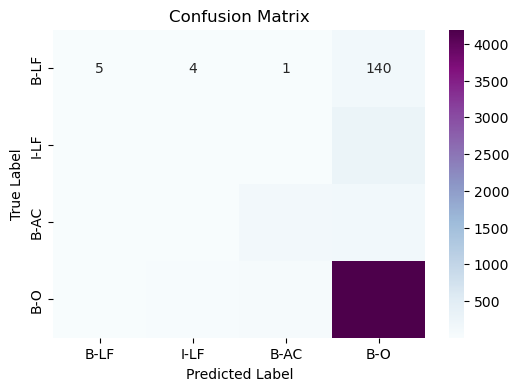

In [17]:
# function is defined to map numerical labels back to their original class names
def map_labels_to_names(labels, label_to_index):
    index_to_label = {v: k for k, v in label_to_index.items()}
    return [index_to_label[label] for label in labels]

# only the labels corresponding to the validation set is used
valid_labels_names = map_labels_to_names(valid_labels, label_to_index)
y_pred_names_valid = map_labels_to_names(y_pred_valid, label_to_index)

# only the labels corresponding to the test set is used
test_labels_names = map_labels_to_names(test_labels, label_to_index)
y_pred_names = map_labels_to_names(y_pred_test, label_to_index)

print(classification_report(test_labels_names, y_pred_names))

# Confusion matrix is generated for test results
con_mat = confusion_matrix(test_labels, y_pred_test)

# Also, a heatmap is plotted to enhance visualization
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=label_to_index.keys(), yticklabels=label_to_index.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


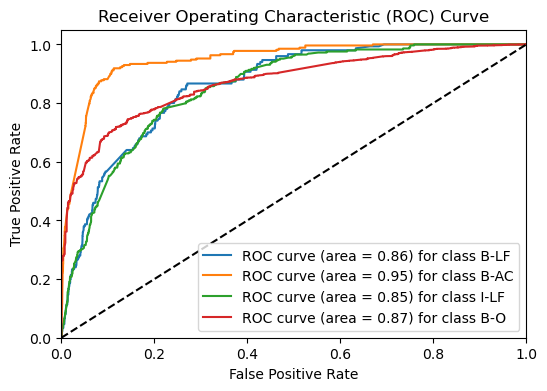

In [43]:
# Probabilities are plotted on test set instead of class labels
y_pred_prob_test = model.predict(test_embeddings_flat)

# a softmax function is defined to compute probabilities
def softm(x):
    exp_x = np.exp(x - np.max(x))  # Subtracting the maximum value for numerical stability
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

y_pred_prob_test = softm(y_pred_prob_test)

# the classes are defined
classes = list(label_to_index.keys())

# ROC area is calculated for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(test_labels == i, y_pred_prob_test[:, i])  
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC curve is plotted
plt.figure(figsize=(6, 4))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.3f) for class %s' % (roc_auc[i], classes[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Experiment4 - Comparing Different Loss Functions and Optimizers

### 4.1) Using SPACY and ANN 

Keras is used for creating an Artificial Neural Network (ANN) model and it is trained with various combinations of loss functions and optimizers. To assess the model on validation and test datasets, F1 scores are used. Confusion matrices are depicted to show the classification performance. Overall, the code tries to find the best combination of optimizer and loss function, by systematically experimenting with different settings.

C:\Users\Sayonesh Chatterjee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model with <keras.src.optimizers.adam.Adam object at 0x000002889F16D290> optimizer and sparse_categorical_crossentropy loss...
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
F1 Score for Validation Data: 0.8367876657928498
F1 Score for Test Data: 0.8377100685671621



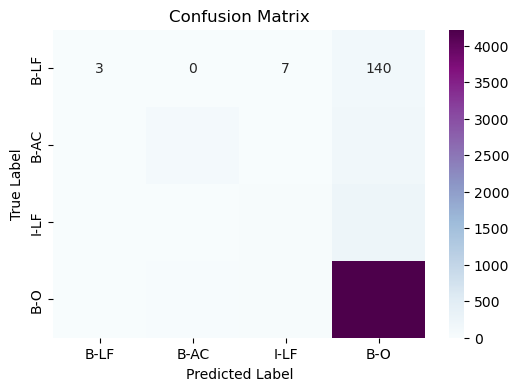

Training model with <keras.src.optimizers.adam.Adam object at 0x000002889F16D290> optimizer and categorical_crossentropy loss...
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1 Score for Validation Data: 0.8202753378083507
F1 Score for Test Data: 0.8219518254676986



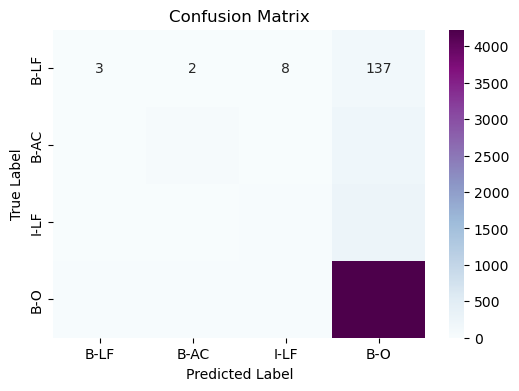

Training model with <keras.src.optimizers.rmsprop.RMSprop object at 0x00000288CAD78E90> optimizer and sparse_categorical_crossentropy loss...
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1 Score for Validation Data: 0.8382473595735098
F1 Score for Test Data: 0.8411269110730358



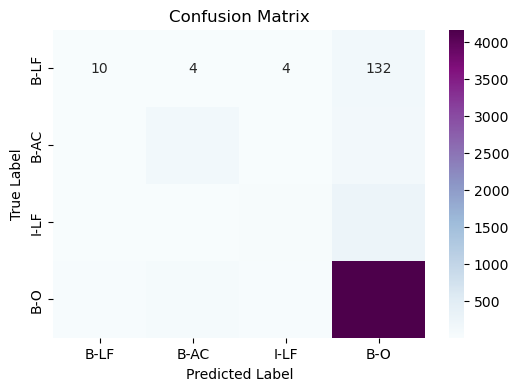

Training model with <keras.src.optimizers.rmsprop.RMSprop object at 0x00000288CAD78E90> optimizer and categorical_crossentropy loss...
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1 Score for Validation Data: 0.8390577251205723
F1 Score for Test Data: 0.8354750251325699



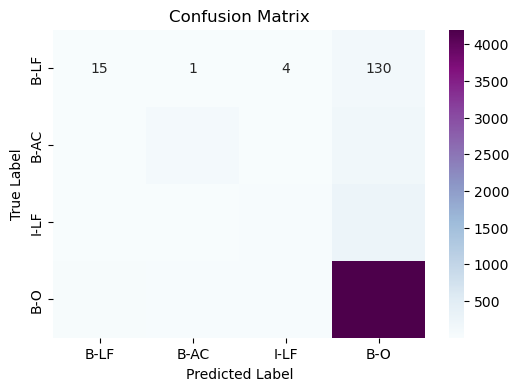

Training model with <keras.src.optimizers.sgd.SGD object at 0x00000288CE4153D0> optimizer and sparse_categorical_crossentropy loss...
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1 Score for Validation Data: 0.8390441904860895
F1 Score for Test Data: 0.8332050328721532



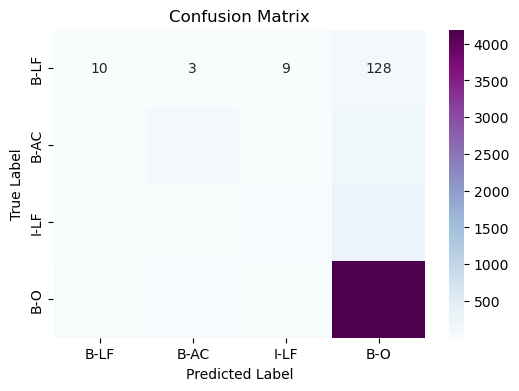

Training model with <keras.src.optimizers.sgd.SGD object at 0x00000288CE4153D0> optimizer and categorical_crossentropy loss...
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1 Score for Validation Data: 0.8397150250192424
F1 Score for Test Data: 0.8330797100614231



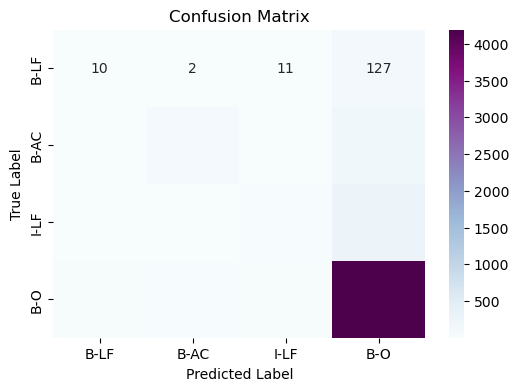

In [115]:
# For each token, we get the corresponding embedding
def sayo(tokens):
    embeddings = []
    for token in tokens:
        embedding = nlp_spacy(token).vector
        embeddings.append(embedding)
    return embeddings

# Feature extraction is applied to the training data
train_embeddings = [sayo(i) for i in train_data['tokens']]
train_embeddings_flat = np.array([embedding for sub in train_embeddings for embedding in sub])

# Feature extraction is applied to validation data
validation_embeddings = [sayo(j) for j in valid_data['tokens']]
validation_embeddings_flat = np.array([embedding for sub in validation_embeddings for embedding in sub])

# Feature extraction is applied to test data
test_embeddings = [sayo(k) for k in test_data['tokens']]
test_embeddings_flat = np.array([embedding for sub in test_embeddings for embedding in sub])

# the 'ner_tags' column is flattened out
train_labels_flat = [label for sub in train_data['ner_tags'] for label in sub]
valid_labels_flat = [label for sub in valid_data['ner_tags'] for label in sub]
test_labels_flat = [label for sub in test_data['ner_tags'] for label in sub]

# labels are converted to numerical indices
label_to_index = {label: i for i, label in enumerate(set(train_labels_flat))}
train_labels = np.array([label_to_index[label] for label in train_labels_flat])
valid_labels = np.array([label_to_index[label] for label in valid_labels_flat])
test_labels = np.array([label_to_index[label] for label in test_labels_flat])

# labels are also converetd to one-hot encoded format
train_labels_onehot = to_categorical(train_labels, num_class=len(label_to_index))
valid_labels_onehot = to_categorical(valid_labels, num_class=len(label_to_index))
test_labels_onehot = to_categorical(test_labels, num_class=len(label_to_index))

# data arrays are reshaped to be fed to the model
train_embeddings_flat = train_embeddings_flat.reshape(-1, 300)
validation_embeddings_flat = validation_embeddings_flat.reshape(-1, 300)
test_embeddings_flat = test_embeddings_flat.reshape(-1, 300)

# ANN model is defined

rock = Sequential([
    Dense(250, activation='relu', input_shape=(300,)),
    Dropout(0.5),
    Dense(120 activation='relu'),
    Dropout(0.5),
    Dense(len(label_to_index), activation='softmax')
])

# list of optimizers and loss functions is initialized to be fed to the model
optimizers = [Adam(), RMSprop(), SGD()]
loss_functions = ['sparse_categorical_crossentropy', 'categorical_crossentropy']

# for loop to loop over different optimizers from the list
for optimizer in optimizers:
    # a nested for loop to loop over different loss functions for each optimizer from the previous loop
    for loss_function in loss_functions:
        print(f"Training model with {optimizer} optimizer and {loss_function} loss...")
        # model is compiled with the specific optimizer and loss function obtained earlier
        rock.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

        # model is fitted with appropiate data depending on the loss function
        if loss_function == 'sparse_categorical_crossentropy':
            rock.fit(train_embeddings_flat, train_labels, epochs=60, batch_size=128, validation_split=0.1, verbose=0)
        elif loss_function == 'categorical_crossentropy':
            rock.fit(train_embeddings_flat, train_labels_onehot, epochs=60, batch_size=128, validation_split=0.1, verbose=0)

        
        y_pred_valid = np.argmax(model.predict(validation_embeddings_flat), axis=1)
        valid_labels_truncated = valid_labels[:len(y_pred_valid)]
        # predictions are made on validation data
        f1_valid = f1_score(valid_labels_truncated, y_pred_valid, average='weighted')

        y_pred_test = np.argmax(model.predict(test_embeddings_flat), axis=1)
        test_labels_truncated = test_labels[:len(y_pred_test)]
        # predictions are made on test data
        f1_test = f1_score(test_labels_truncated, y_pred_test, average='weighted')

        print(f"F1 Score for Validation Data: {f1_valid}")
        print(f"F1 Score for Test Data: {f1_test}")
        print()

        # function to map labels to their original names
        def map_labels_names(labels, label_to_index):
            index_to_label = {v: k for k, v in label_to_index.items()}
            return [index_to_label[label] for label in labels]

        # only the labels corresponding to the validation set is used
        valid_labels_names = map_labels_names(valid_labels, label_to_index)
        y_pred_names_valid = map_labels_names(y_pred_valid, label_to_index)

        test_labels_names = map_labels_names(test_labels, label_to_index)
        y_pred_names = map_labels_names(y_pred_test, label_to_index)

        # Confusion matrix is generated for test results
        con_mat = confusion_matrix(test_labels_truncated, y_pred_test)

        # Also, a heatmap is plotted to enhance visualization
        plt.figure(figsize=(6, 4))
        sns.heatmap(con_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=label_to_index.keys(), yticklabels=label_to_index.keys())
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()

### 4.2) Using SPACY and CNN

Keras is used for creating a Convolutional Neural Network(CNN) model and it is trained with various combinations of loss functions and optimizers. To assess the model on validation and test datasets, F1 scores are used. Confusion matrices are depicted to show the classification performance. Overall, the code tries to find the best combination of optimizer and loss function, by systematically experimenting with different settings.

C:\Users\Sayonesh Chatterjee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Training model with <keras.src.optimizers.adam.Adam object at 0x00000288E61C4610> optimizer and sparse_categorical_crossentropy loss...
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
F1 Score for Validation Data: 0.839502935036913
F1 Score for Test Data: 0.8436668664125889



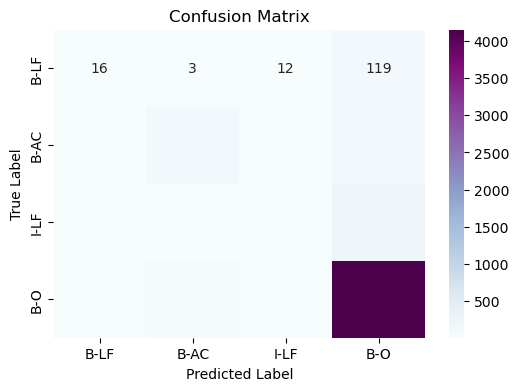

Training model with <keras.src.optimizers.adam.Adam object at 0x00000288E61C4610> optimizer and categorical_crossentropy loss...
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
F1 Score for Validation Data: 0.8436699052609778
F1 Score for Test Data: 0.8433370040292538



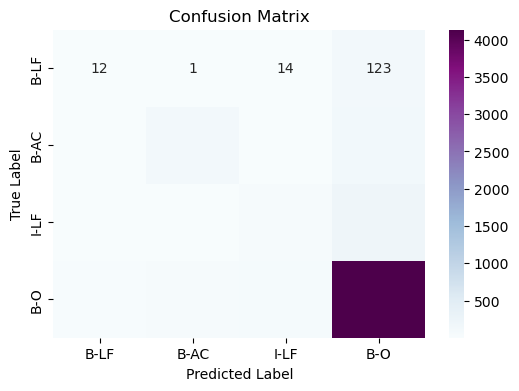

Training model with <keras.src.optimizers.rmsprop.RMSprop object at 0x00000288D3E396D0> optimizer and sparse_categorical_crossentropy loss...
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
F1 Score for Validation Data: 0.8452242114914343
F1 Score for Test Data: 0.8429386697569368



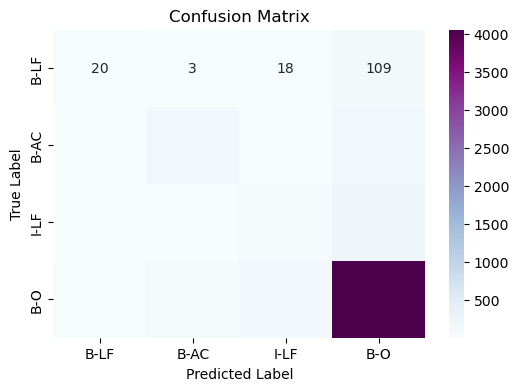

Training model with <keras.src.optimizers.rmsprop.RMSprop object at 0x00000288D3E396D0> optimizer and categorical_crossentropy loss...
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
F1 Score for Validation Data: 0.8490322414875107
F1 Score for Test Data: 0.8456821049000893



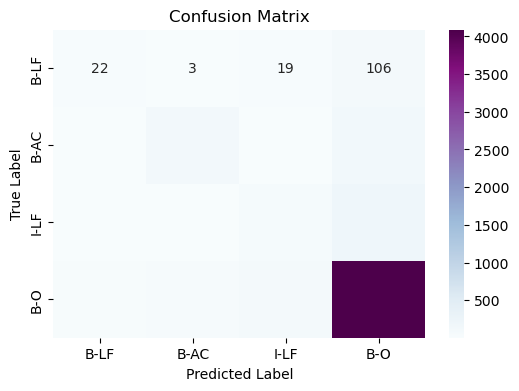

Training model with <keras.src.optimizers.sgd.SGD object at 0x00000288CBB5D150> optimizer and sparse_categorical_crossentropy loss...
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
F1 Score for Validation Data: 0.8459694838754201
F1 Score for Test Data: 0.84493635536787



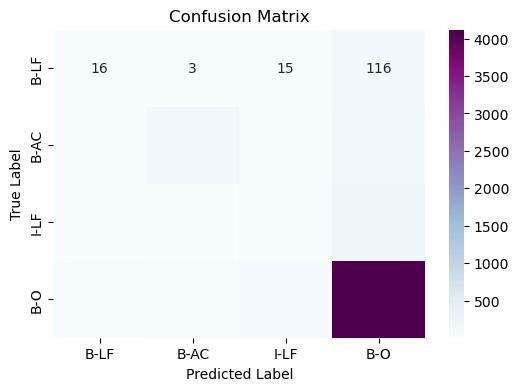

Training model with <keras.src.optimizers.sgd.SGD object at 0x00000288CBB5D150> optimizer and categorical_crossentropy loss...
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
F1 Score for Validation Data: 0.8476138717467329
F1 Score for Test Data: 0.8450301121628676



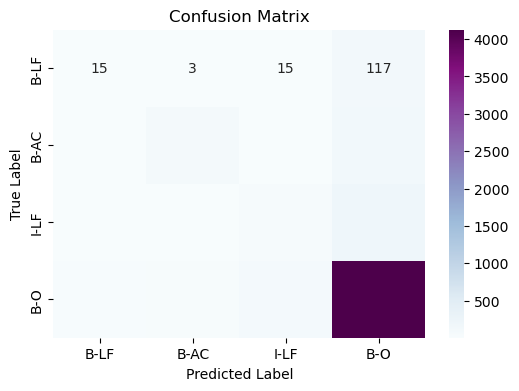

In [116]:
# For each token, we get the corresponding embedding
def sayo(tokens):
    embeddings = []
    for token in tokens:
        embedding = nlp_spacy(token).vector
        embeddings.append(embedding)
    return embeddings

# Feature extraction is applied to the training data
train_embeddings = [sayo(i) for i in train_data['tokens']]
train_embeddings_flat = np.array([embedding for sub in train_embeddings for embedding in sub])

# Feature extraction is applied to validation data
validation_embeddings = [sayo(j) for j in valid_data['tokens']]
validation_embeddings_flat = np.array([embedding for sub in validation_embeddings for embedding in sub])

# Feature extraction is applied to test data
test_embeddings = [sayo(k) for k in test_data['tokens']]
test_embeddings_flat = np.array([embedding for sub in test_embeddings for embedding in sub])

# data arrays are reshaped to fit CNN input shape
train_embeddings_flat = train_embeddings_flat.reshape(-1, 300, 1)  # Assuming spaCy vectors are of size 300
validation_embeddings_flat = validation_embeddings_flat.reshape(-1, 300, 1)
test_embeddings_flat = test_embeddings_flat.reshape(-1, 300, 1)

# the 'ner_tags' column is flattened out
train_labels_flat = [label for sub in train_data['ner_tags'] for label in sub]
valid_labels_flat = [label for sub in valid_data['ner_tags'] for label in sub]
test_labels_flat = [label for sub in test_data['ner_tags'] for label in sub]

# labels are converted to appropiate numerical indices
label_to_index = {label: i for i, label in enumerate(set(train_labels_flat))}
train_labels = np.array([label_to_index[label] for label in train_labels_flat])
valid_labels = np.array([label_to_index[label] for label in valid_labels_flat])
test_labels = np.array([label_to_index[label] for label in test_labels_flat])

# Convert labels to one-hot encoded format
train_labels_onehot = to_categorical(train_labels, num_class=len(label_to_index))
valid_labels_onehot = to_categorical(valid_labels, num_class=len(label_to_index))
test_labels_onehot = to_categorical(test_labels, num_class=len(label_to_index))

# CNN model is defined
rock = Sequential([
    Conv1D(120, 4, activation='tanh', input_shape=(300, 1)),
    MaxPooling1D(pool_size=5),
    Conv1D(60, 4, activation='relu'),
    MaxPooling1D(pool_size=5),
    Flatten(),
    Dense(120, activation='relu'),
    Dropout(0.2),
    Dense(len(label_to_index), activation='softmax')
])

# list of optimizers and loss functions is initialized to be fed to the model
optimizers = [Adam(), RMSprop(), SGD()]
loss_functions = ['sparse_categorical_crossentropy', 'categorical_crossentropy']

# for loop to loop over different optimizers from the list
for optimizer in optimizers:
    # a nested for loop to loop over different loss functions for each optimizer from the previous loop
    for loss_function in loss_functions:
        print(f"Training model with {optimizer} optimizer and {loss_function} loss...")
        # model is compiled with the specific optimizer and loss function obtained earlier
        rock.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

        # model is fitted with appropiate data depending on the loss function
        if loss_function == 'sparse_categorical_crossentropy':
            rock.fit(train_embeddings_flat, train_labels, epochs=60, batch_size=128, validation_split=0.1, verbose=0)
        elif loss_function == 'categorical_crossentropy':
            rock.fit(train_embeddings_flat, train_labels_onehot, epochs=60, batch_size=128, validation_split=0.1, verbose=0)

        # predictions are made on validation data
        y_pred_valid = np.argmax(model.predict(validation_embeddings_flat), axis=1)
        valid_labels_truncated = valid_labels[:len(y_pred_valid)]
        f1_valid = f1_score(valid_labels_truncated, y_pred_valid, average='weighted')

        # predictions are made on test data
        y_pred_test = np.argmax(model.predict(test_embeddings_flat), axis=1)
        test_labels_truncated = test_labels[:len(y_pred_test)]
        f1_test = f1_score(test_labels_truncated, y_pred_test, average='weighted')

        print(f"F1 Score for Validation Data: {f1_valid}")
        print(f"F1 Score for Test Data: {f1_test}")
        print()
        
        # function to map labels to their original names
        def map_labels_names(labels, label_to_index):
            index_to_label = {v: k for k, v in label_to_index.items()}
            return [index_to_label[label] for label in labels]

        # only the labels corresponding to the validation set is used
        valid_labels_names = map_labels_names(valid_labels, label_to_index)
        y_pred_names_valid = map_labels_names(y_pred_valid, label_to_index)

        test_labels_names = map_labels_names(test_labels, label_to_index)
        y_pred_names = map_labels_names(y_pred_test, label_to_index)

        # Confusion matrix is generated for test results
        con_mat = confusion_matrix(test_labels_truncated, y_pred_test)

        # Also, a heatmap is plotted to enhance visualization
        plt.figure(figsize=(6, 4))
        sns.heatmap(con_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=label_to_index.keys(), yticklabels=label_to_index.keys())
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()